In [1]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv("wine_data.csv",header=0,usecols=[0,1,2])
df.columns=['Class_Label', 'Alcohol','Malic_Acid']

In [18]:
df.sample(5)

,Class_Label,Alcohol,Malic_Acid
96,2,12.29,1.41
118,2,12.00,3.43
133,3,12.51,1.24
67,2,13.34,0.94
135,3,12.25,4.72


In [19]:
import seaborn as sns

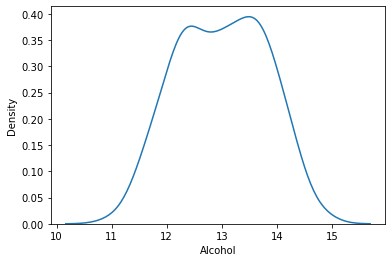

In [20]:
sns.kdeplot(x=df.Alcohol);

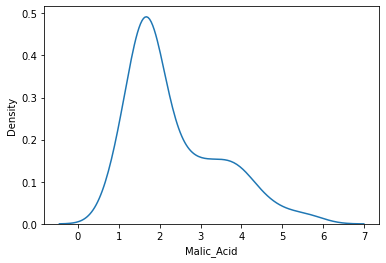

In [21]:
sns.kdeplot(x=df.Malic_Acid);

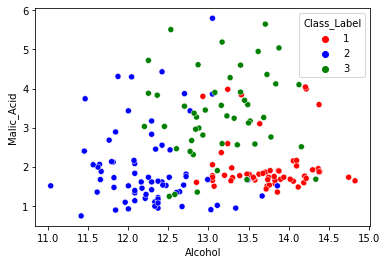

In [23]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(data=df, x='Alcohol', y='Malic_Acid', hue='Class_Label', palette=color_dict);

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scalar=MinMaxScaler()

In [26]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(df.drop('Class_Label',axis=1), df.Class_Label, test_size=0.25, random_state=17)
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((132, 2), (45, 2), (132,), (45,))

In [54]:
scalar.fit(Xtrain)

Xtrain_s=scalar.transform(Xtrain)
Xtest_s=scalar.transform(Xtest)

In [55]:
scalar.min_

array([-3.33625731, -0.15071283])

In [58]:
Xtrain_s=pd.DataFrame(data=Xtrain_s,columns=Xtrain.columns)
Xtest_s=pd.DataFrame(data=Xtest_s,columns=Xtest.columns)

In [59]:
Xtrain_s.describe()

,Alcohol,Malic_Acid
count,132.000000,132.000000
mean,0.489567,0.315297
std,0.231704,0.227816
min,0.000000,0.000000
25%,0.291667,0.160387
50%,0.497076,0.225051
75%,0.676170,0.455703
max,1.000000,1.000000


In [60]:
import matplotlib.pyplot as plt

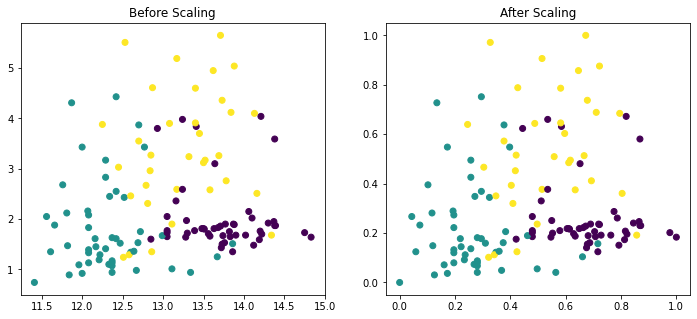

In [61]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(Xtrain["Alcohol"],Xtrain['Malic_Acid'], c=ytrain)
ax1.set_title("Before Scaling")

ax2.scatter(Xtrain_s["Alcohol"],Xtrain_s['Malic_Acid'], c=ytrain)
ax2.set_title("After Scaling")

plt.show()

In [62]:
Xtrain_s.describe()

,Alcohol,Malic_Acid
count,132.000000,132.000000
mean,0.489567,0.315297
std,0.231704,0.227816
min,0.000000,0.000000
25%,0.291667,0.160387
50%,0.497076,0.225051
75%,0.676170,0.455703
max,1.000000,1.000000


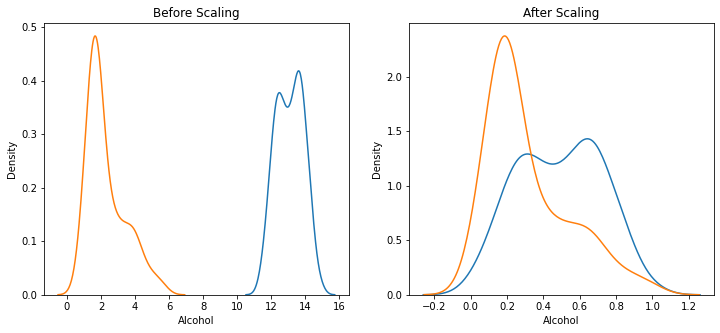

In [66]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x=Xtrain.Alcohol, ax=ax1)
sns.kdeplot(x=Xtrain.Malic_Acid, ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x=Xtrain_s.Alcohol, ax=ax2)
sns.kdeplot(x=Xtrain_s.Malic_Acid, ax=ax2)

plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression


In [68]:
lr=LogisticRegression()
lr_s=LogisticRegression()

In [70]:
lr.fit(Xtrain,ytrain)
lr_s.fit(Xtrain_s,ytrain)

LogisticRegression()

In [72]:
y_pred= lr.predict(Xtest)
y_pred_s = lr_s.predict(Xtest_s)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
print("Actual",accuracy_score(ytest,y_pred))
print("Scaled",accuracy_score(ytest,y_pred_s))

Actual 0.8
Scaled 0.7777777777777778
